# Pokemon Image Classification

In this notebook, I do some deep learning with this [Kaggle dataset of Pokemon images](https://www.kaggle.com/datasets/lantian773030/pokemonclassification?datasetId=410745&sortBy=voteCount). This data includes hand-cropped and labeled Pokemon images that vary from images from the TV show, to Pokemon card art, and anything in between. I will try to use this data to build an image classifier that can accurately predict what Pokemon is represented given an image. 

Notes:

Steps for approaching image classification questions:
- understand the problem 
- collect and preprocess data (resizing, normalizing, augmentation, train-test-split; done with ImageDataGenerator class from tensorflow or dataloaders in PyTorch)
- determine CNN architecture (define model architecture class with layers, forward pass) 
- compile models (define loss function and optimizer, evaluation metrics)
- train models (training loop)
- evaluate models (learning curves, visualizations, etc.)

## Package Import

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
import splitfolders

import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from tensorflow.keras.optimizers import Adam

from keras.applications.mobilenet import preprocess_input
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.layers import Dense,GlobalAveragePooling2D, Dropout

## Data Preprocessing

I begin by creating the train-test split for the image data.

In [5]:
splitfolders.ratio('data/PokemonData/', output='data/ImageSplit', seed=42, ratio=(0.8,0.2))

In [7]:
data_generator = ImageDataGenerator(rescale=1./255)

train_gen = data_generator.flow_from_directory('data/ImageSplit/train',
                                               target_size=(256, 256),
                                               class_mode='categorical')

val_gen = data_generator.flow_from_directory('data/ImageSplit/val',
                                             target_size=(256, 256),
                                             class_mode='categorical')


Found 5394 images belonging to 150 classes.
Found 1426 images belonging to 150 classes.


To see if the train-test split was done correctly and our data has been loaded into the generator objects properly, we can visualize some of the images and their corresponding labels in the training set.

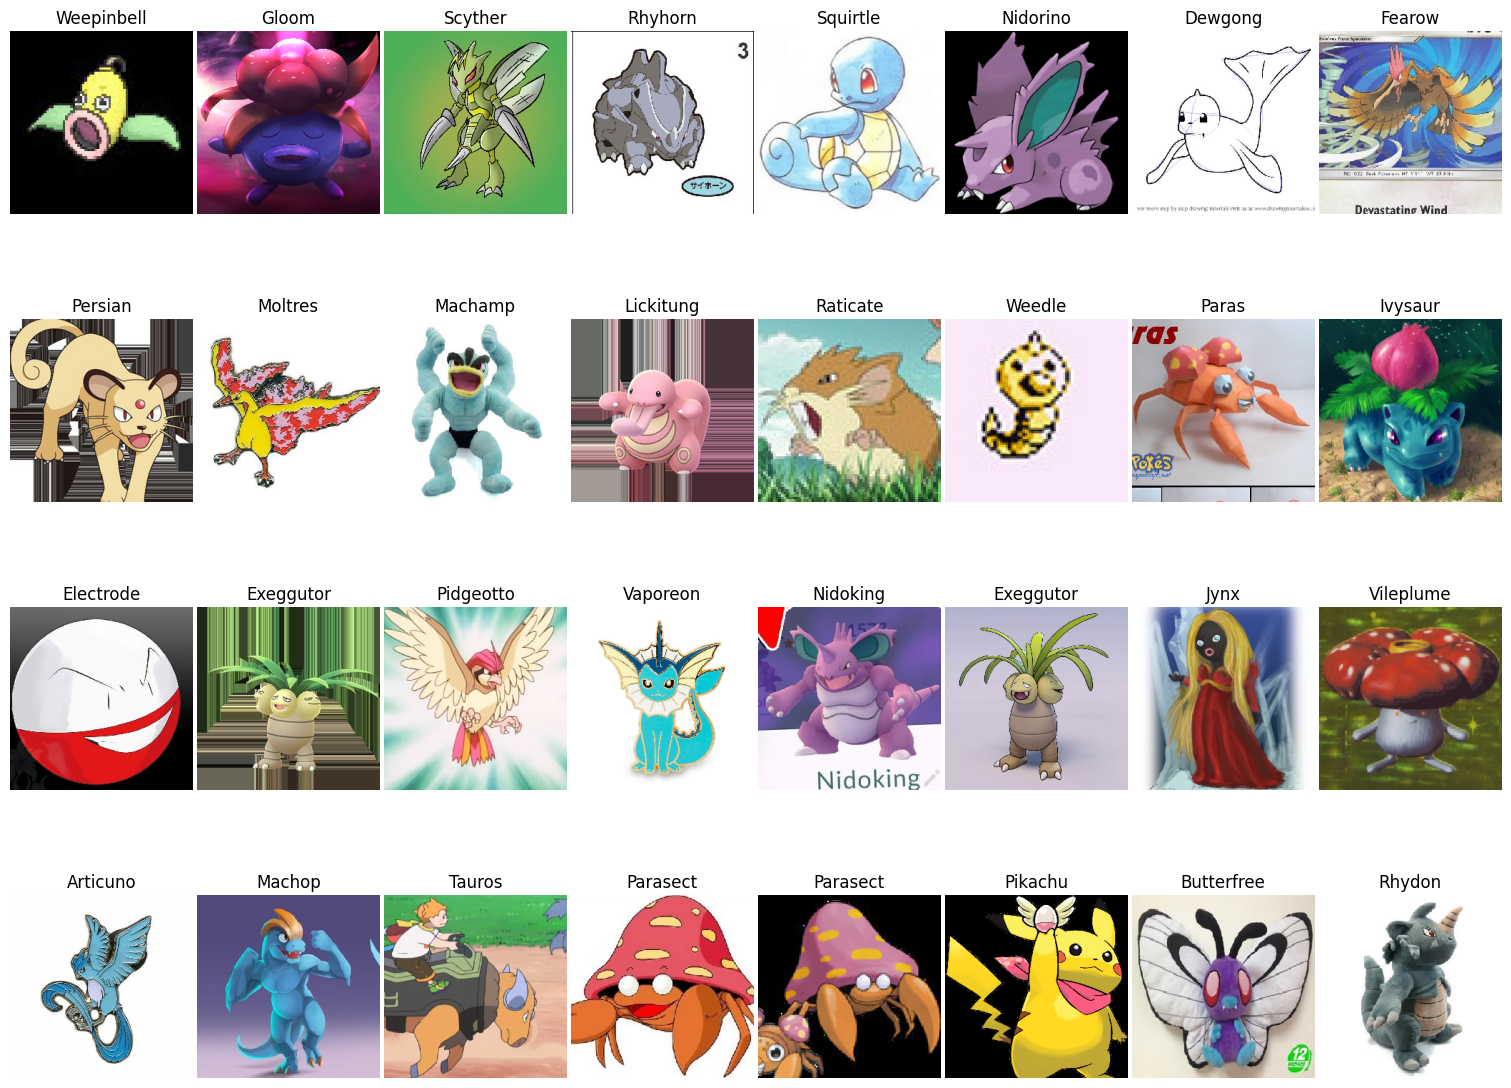

In [17]:
import matplotlib.pyplot as plt

num_images = 1  # Set the number of batches retrieved
row_length = 8  # Set the number of images per row
image_size = (4, 4)  # Set the size of each image

class_labels = train_gen.class_indices
class_labels = {v: k for k, v in class_labels.items()}

for i in range(num_images):
    images, labels = next(train_gen)

    labels = np.argmax(labels, axis=1)
    labels = [class_labels[label] for label in labels]

    plt.figure(figsize=(15, 15)) 

    for j in range(len(images)):
        plt.subplot(32 // row_length + 1, row_length, j + 1)
        plt.imshow(images[j])
        plt.axis('off')
        plt.title(labels[j])
        plt.tight_layout(pad=0.3)

    plt.show()


## Modeling